# **Title**: Generate the XR/AR Dataset for IPI, FS, IFI using johnsonsu Distribution With specified Parameters

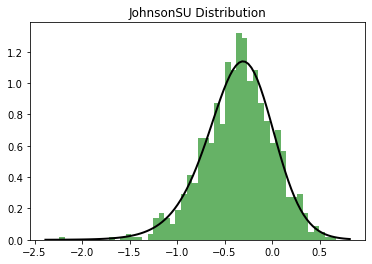

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import johnsonsu

# Set the parameters

a, b = 1.0, 3.0
loc, scale = 0.0, 1.0

# Generate random samples from a Johnson's S_U distribution
data = johnsonsu.rvs(a, b, loc=loc, scale=scale, size=1000)

# Plot the histogram
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# Plot the probability density function (PDF)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = johnsonsu.pdf(x, a, b, loc=loc, scale=scale)
plt.plot(x, p, 'k', linewidth=2)

plt.title('JohnsonSU Distribution')
plt.show()


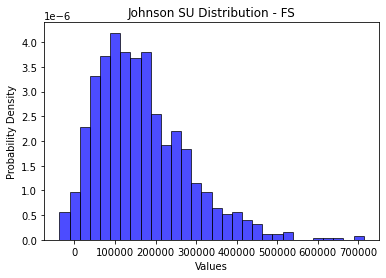

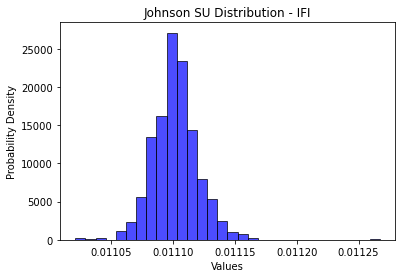

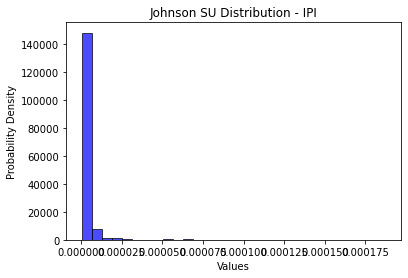

Combined Dataset:
   FS_CustomValues  IFI_CustomValues  IPI_CustomValues
0    231372.630754          0.011121          0.000002
1    171785.817619          0.011105          0.000002
2     84864.493950          0.011103          0.000003
3    601125.661367          0.011090          0.000002
4     77273.052037          0.011126          0.000009


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import johnsonsu
import matplotlib.pyplot as plt

def generate_combined_dataset(params_list, column_name='Values', dataset_names=None):
    """
    Generate Johnson SU distribution datasets and combine them into one DataFrame.

    Parameters:
    - params_list: List of dictionaries, each containing parameters for a Johnson SU distribution.
    - column_name: Name for the column containing the distribution values.
    - dataset_names: List of names for each dataset.

    Returns:
    - Pandas DataFrame containing the combined dataset with different columns.
    """

    combined_data = {}

    for i, params in enumerate(params_list):
        # Generate dataset
        data = johnsonsu.rvs(a=params['shape_a'], b=params['shape_b'],
                             loc=params['loc'], scale=params['scale'],
                             size=params['size'])

        # Get the dataset name
        dataset_name = f'Dataset_{i + 1}' if dataset_names is None else dataset_names[i]

        # Add data to the combined_data dictionary with dynamic column names
        col_prefix = f'{dataset_name}_'
        combined_data[col_prefix + column_name] = data

        # Visualize the dataset
        plt.hist(data, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
        plt.title(f'Johnson SU Distribution - {dataset_name}')
        plt.xlabel('Values')
        plt.ylabel('Probability Density')
        plt.show()

    # Create a DataFrame from the combined_data dictionary
    combined_df = pd.DataFrame(combined_data)

    return combined_df

#  ***************************************** Generate Johnson SU distribution Parameters ***************************************************
## ************************************************************************************** Uplink or stream1
### Low Resolution in AR
#### Frame size, Inter-Frame-Interval, IP Packet-Interval

params_list_LR = [
    {'shape_a': -0.869, 'shape_b': 1.123, 'loc': 28204.99, 'scale': 4990.40, 'size': 1000},
    {'shape_a': 0.0281, 'shape_b': 1.222, 'loc': 0.01676, 'scale': 0.000204, 'size': 1000},
    {'shape_a': -1.200, 'shape_b': 0.465, 'loc': 1.61e-6, 'scale': 4.11e-8, 'size': 1000}
]


### Medium Resolution in AR
#### Frame size, Inter-Frame-Interval, IP Packet-Interval## Medium Resolution in AR
### Frame size, Inter-Frame-Interval, IP Packet-Interval

params_list_MR = [
    {'shape_a': -0.781, 'shape_b': 1.180, 'loc': 73230.79, 'scale': 12559.32, 'size': 1000},
    {'shape_a': 0.114, 'shape_b': 1.551, 'loc': 0.01682, 'scale': 0.00062, 'size': 1000},
    {'shape_a': -1.169, 'shape_b': 0.517, 'loc': 1.71e-6, 'scale': 4.08e-8, 'size': 1000}
]


### High Resolution in AR
#### Frame size, Inter-Frame-Interval, IP Packet-Interval

params_list_HR = [
    {'shape_a': -0.478, 'shape_b': 1.239, 'loc': 220497.49, 'scale': 20161.10, 'size': 1000},
    {'shape_a': -0.679, 'shape_b': 3.158, 'loc': 0.01507, 'scale': 0.007549, 'size': 1000},
    {'shape_a': -1.451, 'shape_b': 0.705, 'loc': 1.86e-6, 'scale': 16.5e-8, 'size': 1000}
]

## ************************************************************************************** Downlink or stream2
### 70 Hz in AR
#### Frame size, Inter-Frame-Interval, IP Packet-Interval

params_list_AR70 = [
    {'shape_a': 0.120, 'shape_b': 0.844, 'loc': 216500.38, 'scale': 52883.59, 'size': 1000},
    {'shape_a': -0.109, 'shape_b': 1.491, 'loc': 0.01388, 'scale': 4.373e-5, 'size': 1000},
    {'shape_a': -1.209, 'shape_b': 0.542, 'loc': 1.59e-6, 'scale': 5.40e-8, 'size': 1000}
]

### 90 Hz in AR
#### Frame size, Inter-Frame-Interval, IP Packet-Interval

params_list_AR90 = [
    {'shape_a': -9.761, 'shape_b': 2.691, 'loc': -136187.44, 'scale': 14897.09, 'size': 1000},
    {'shape_a': -0.132, 'shape_b': 1.517, 'loc': 0.0111, 'scale': 2.30e-5, 'size': 1000},
    {'shape_a': -1.258, 'shape_b': 0.521, 'loc': 1.62e-6, 'scale': 5.31e-8, 'size': 1000}
]


# Custom column name
custom_column_name = 'My'

# Custom dataset names
custom_dataset_names = ['FS', 'IFI', 'IPI']

# Generate combined dataset with custom column name and dataset names
combined_dataset_LR = generate_combined_dataset(params_list_LR, column_name=custom_column_name, dataset_names=custom_dataset_names)
combined_dataset_MR = generate_combined_dataset(params_list_MR, column_name=custom_column_name, dataset_names=custom_dataset_names)
combined_dataset_HR = generate_combined_dataset(params_list_HR, column_name=custom_column_name, dataset_names=custom_dataset_names)
combined_dataset_AR70 = generate_combined_dataset(params_list_AR70, column_name=custom_column_name, dataset_names=custom_dataset_names)
combined_dataset_AR90 = generate_combined_dataset(params_list_AR90, column_name=custom_column_name, dataset_names=custom_dataset_names)

# Save the combined dataset to a CSV file (***************** Add your address to Save th CSV files)
combined_dataset_LR.to_csv('AR_UL_LR.csv', index=False)
combined_dataset_MR.to_csv('AR_UL_MR.csv', index=False)
combined_dataset_HR.to_csv('AR_UL_HR.csv', index=False)
combined_dataset_AR70.to_csv('AR_DL70.csv', index=False)
combined_dataset_AR90.to_csv('AR_DL90.csv', index=False)

# Show the first few rows of the combined dataset
print("Combined Dataset:")
print(combined_dataset_LR.head(5))
print(combined_dataset_MR.head(5))
print(combined_dataset_HR.head(5))
print(combined_dataset_AR70.head(5))
print(combined_dataset_AR90.head(5))

